# Consistentcy of expression patterns between replicates
The below plots compare expression patterns of regulon genes between replicates of the same strain and their average. Regulons from mergedGenes_min18_clusters_filledDiagonal11.tab were used.

In [14]:
import os
import sys
from importlib import reload

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.insert(0,module_path)

import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import sklearn.preprocessing as pp

import DBA as dba

from networks.library_regulons import ClusterAnalyser

In [7]:
dataPath = '/home/karin/Documents/timeTrajectories/data/RPKUM/combined/'
pathRegulons='/home/karin/Documents/timeTrajectories/data/regulons/by_strain/kN300_mean0std1_log/'
pathAvg='/home/karin/Documents/timeTrajectories/data/regulons/'

In [9]:
genes = pd.read_csv(dataPath + 'mergedGenes_RPKUM.tsv', sep='\t', index_col=0)
conditions = pd.read_csv(dataPath + 'conditions_mergedGenes.tsv', sep='\t', index_col=None)
genes_avg=pd.read_table(pathAvg+'genes_averaged_orange.tsv',index_col=0)

In [10]:
regulons=pd.read_table(pathRegulons+'mergedGenes_min18_clusters_filledDiagonal11.tab',index_col=0)

In [11]:
merged = ClusterAnalyser.merge_genes_conditions(genes=genes, conditions=conditions[['Measurment', 'Replicate', 'Time']],
                                                matching='Measurment')
splitted = ClusterAnalyser.split_data(data=merged, split_by='Replicate')
for strain, data in splitted.items():
    # Sort data by time
    data = data.sort_values('Time')
    splitted[strain] = data.drop(["Replicate", 'Measurment'], axis=1).T

In [48]:
# Select genes from regulons to plot their expression in replicates
genes_sub=random.sample(list(genes.index),12)

## Random regulon genes from all strains
Plots of expression (RPKUM) of 12 randomly selected regulon genes for all replicates (separate lines) of each strain. X axis: time, Y axis: expression.

/home/karin/Documents/git/orange3venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


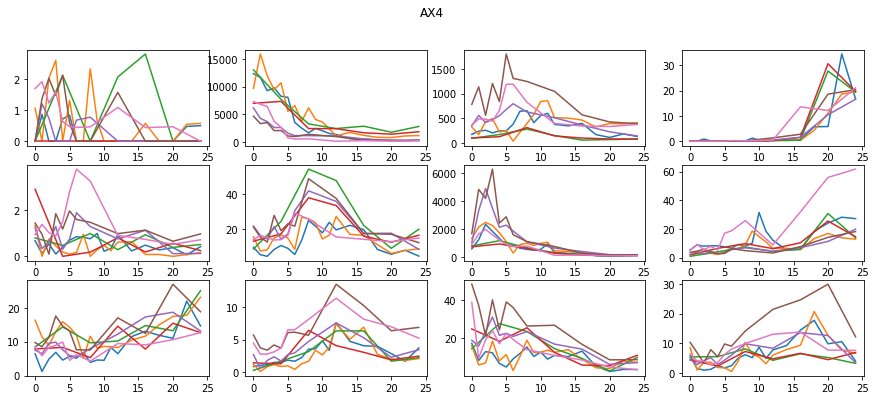

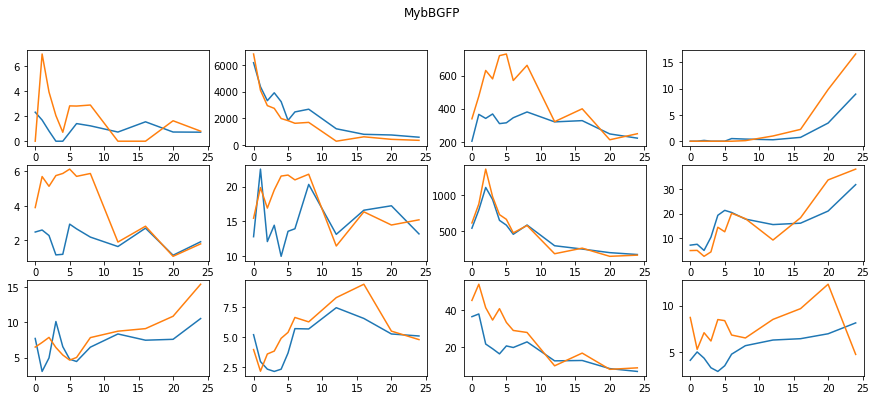

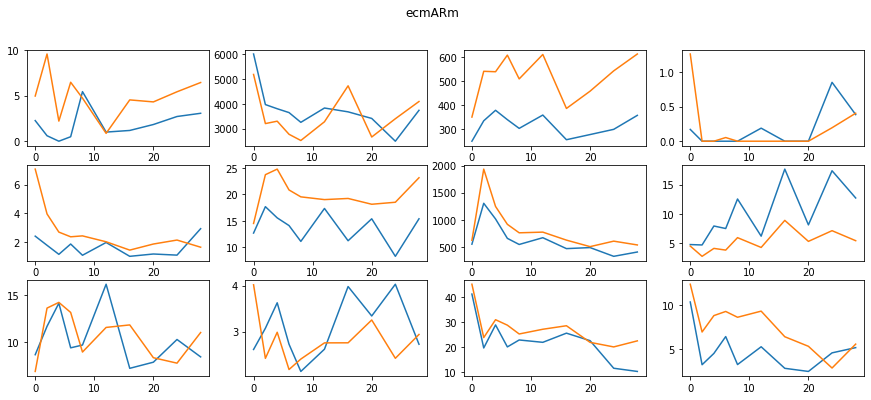

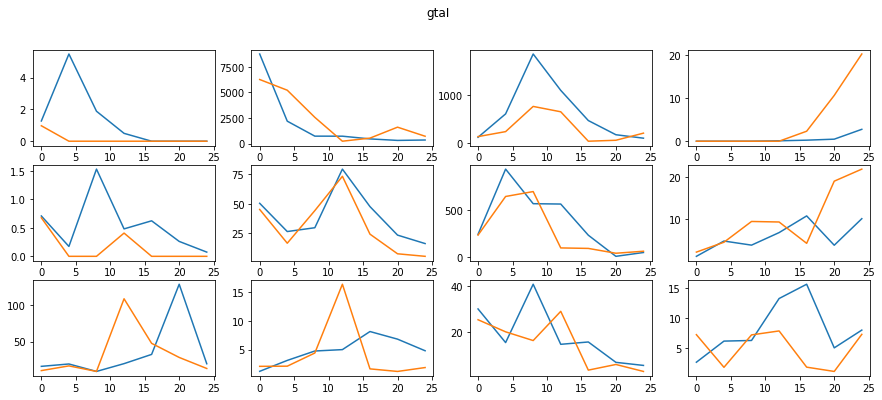

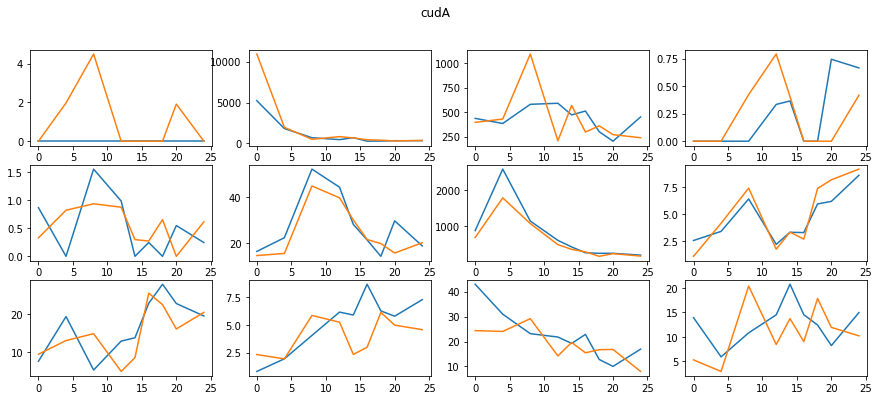

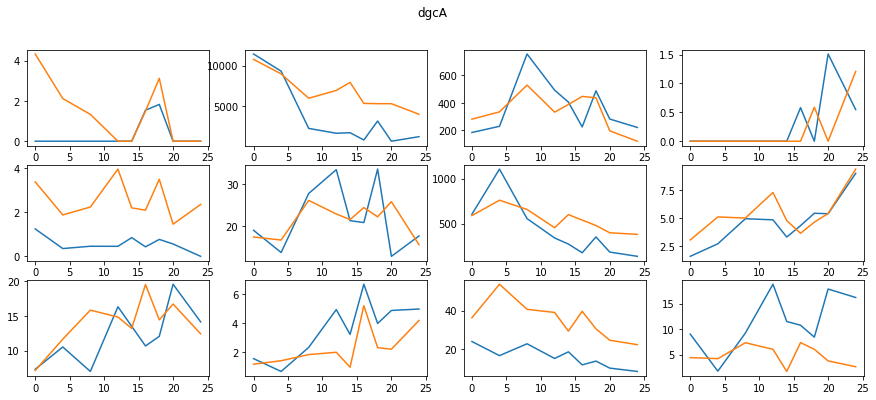

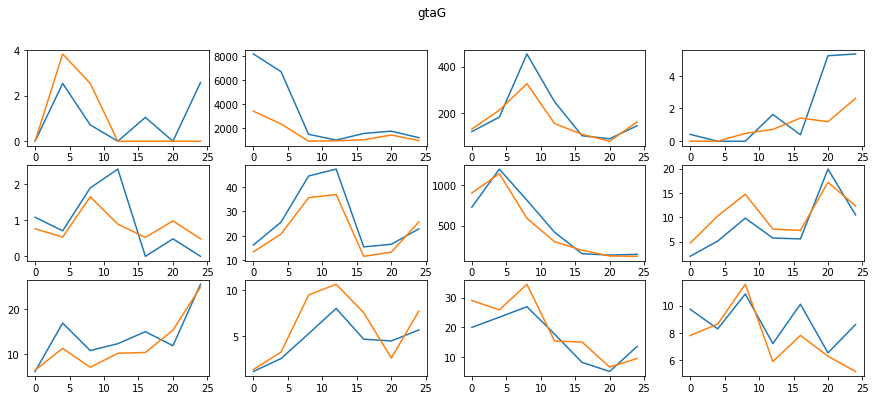

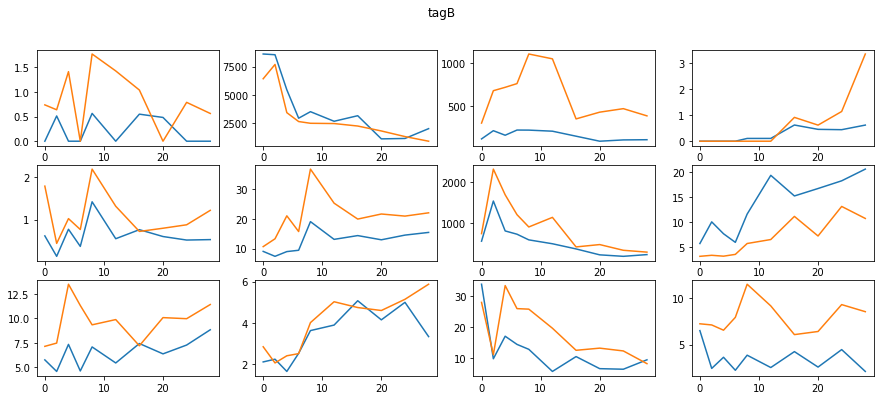

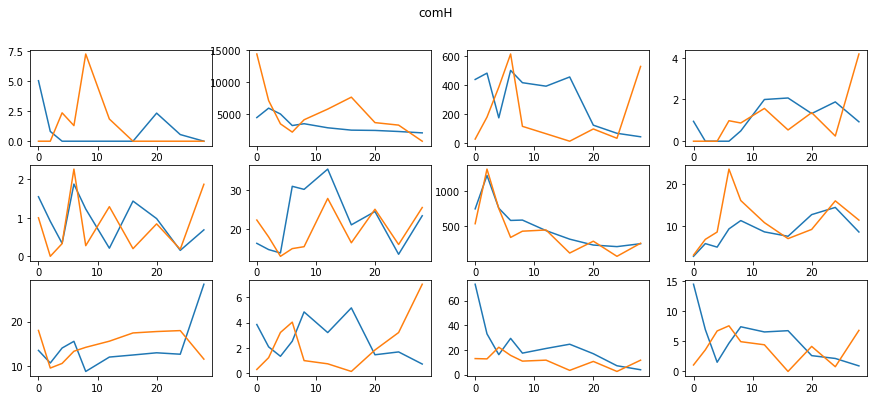

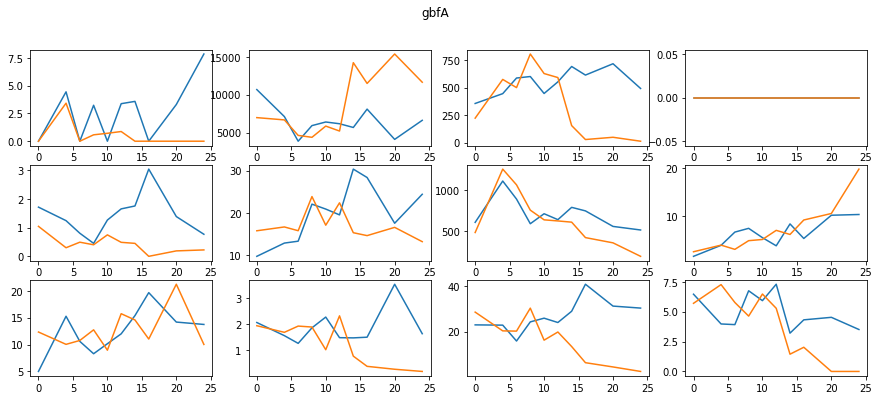

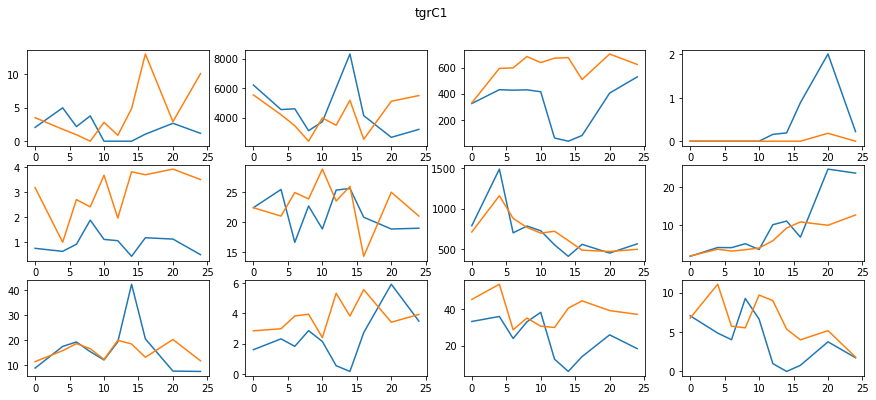

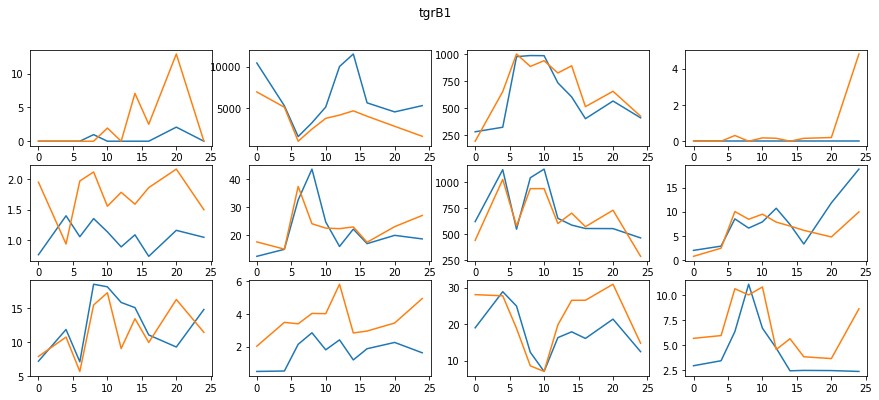

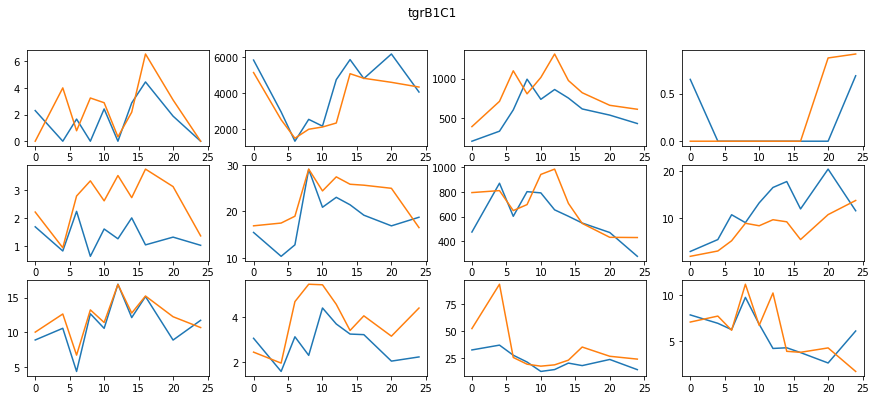

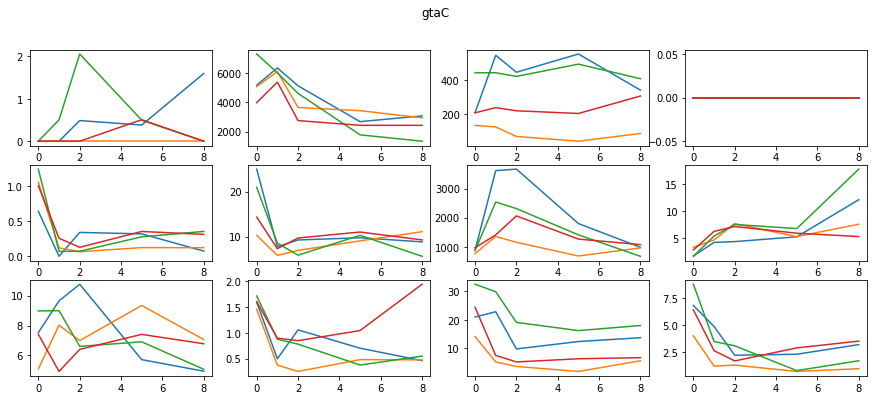

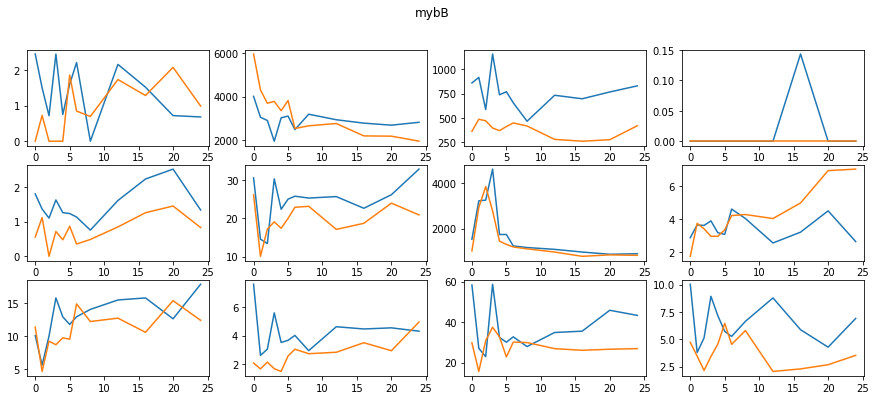

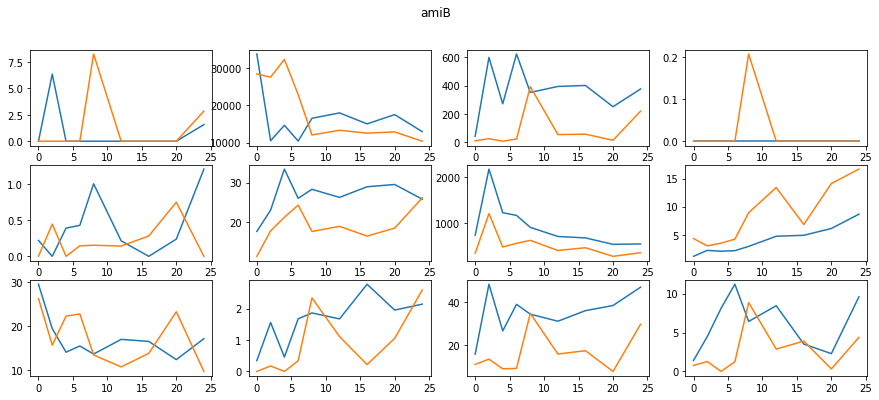

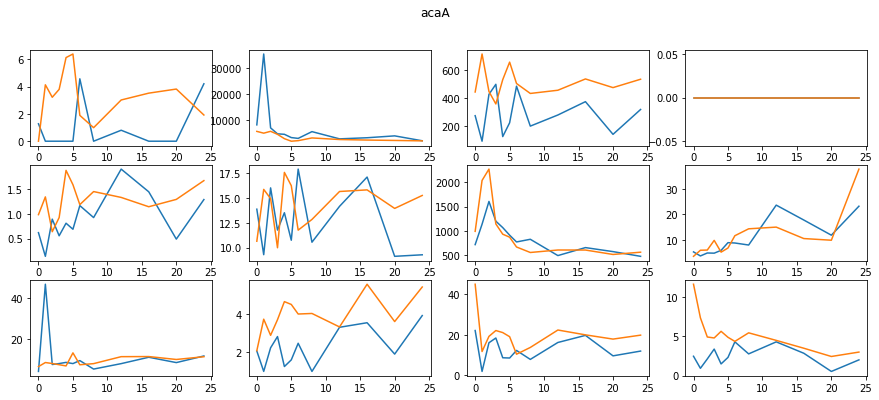

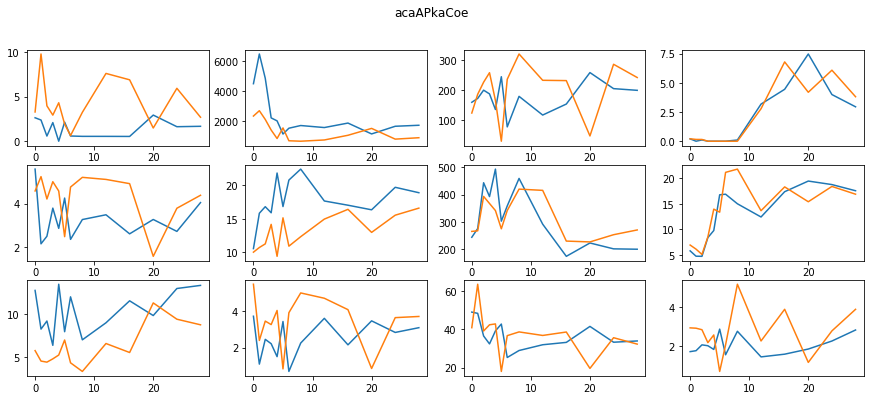

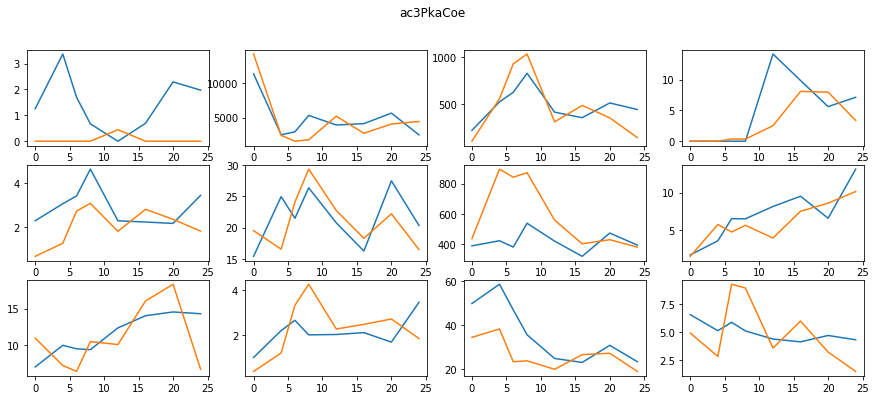

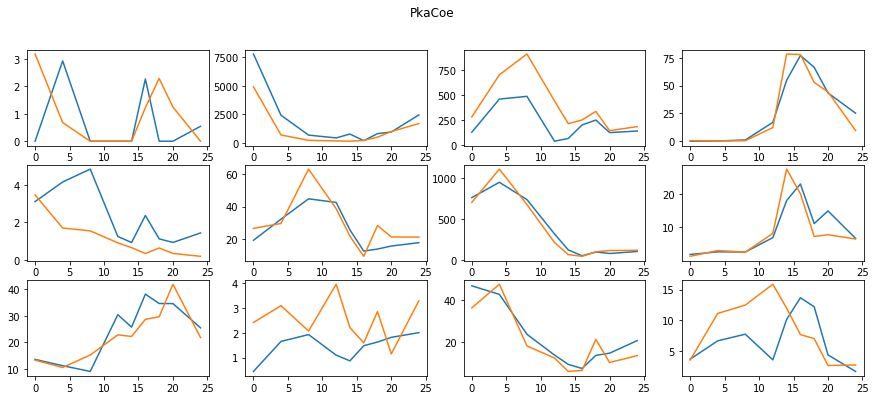

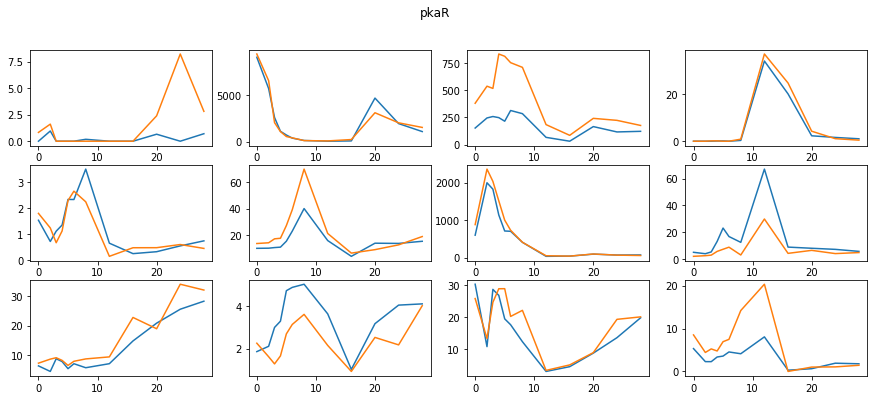

In [56]:
for strain in conditions['Strain'].unique():
    replicates=conditions.query('Strain == "'+strain+'"')['Replicate'].unique()
    fig, axs = plt.subplots(3,4,figsize=(15,6))
    axsN=-1
    fig.suptitle(strain)
    for gene in genes_sub:
        axsN+=1
        axsX=axsN//4
        axsY=axsN%4
        data=[]
        for rep in replicates:
            data_rep=splitted[rep].loc[gene,:].values
            axs[axsX][axsY].plot(splitted[rep].loc['Time',:],data_rep)
            data.append(data_rep)
        #if strain !='AX4':
         #   data=np.array(data)
         #   axs[axsX][axsY].plot(splitted[rep].loc['Time',:],dba.performDBA(data))

## Regulons in AX4 replicates
Plot of regulons in different AX4 replicates and in AX4 average. X axis: time; Y axis: expression, mean=0 and std=1 scaled for each regulon gene. C# - cluster number, avg - average. C9 is the mixed regulon of small coregulated gene grouopus that would require separation or elimination.

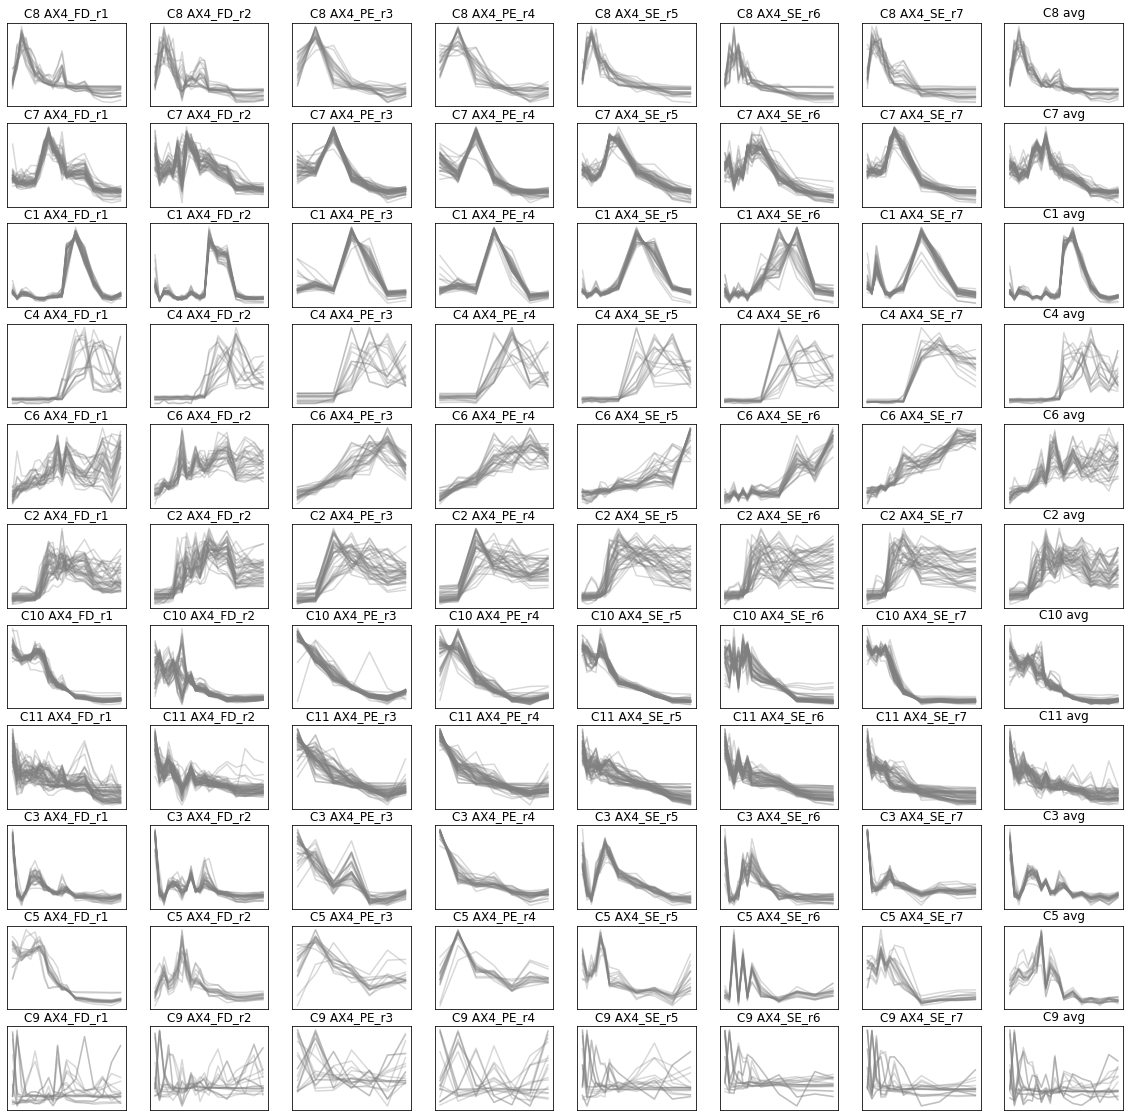

In [30]:
reps=conditions.query('Strain == "AX4"')['Replicate'].unique()
fig, axs = plt.subplots(len(regulons['Cluster'].unique()),8,figsize=(20,20))
axsX=-1
for regulon in regulons['Cluster'].unique():
    axsX+=1
    axsY=-1
    regulon_genes=regulons.query('Cluster == "'+regulon+'"').index
    for rep in reps:
        data=splitted[rep]
        axsY+=1
        axs[axsX][axsY].title.set_text(regulon+' '+rep)
        axs[axsX][axsY].tick_params(axis='both',which='both', left=False,bottom=False,labelleft=False,labelbottom=False)
        for gene in regulon_genes:
            axs[axsX][axsY].plot(data.loc['Time',],pp.scale(data.loc[gene,:]),color='grey',alpha=0.3)
    axsY+=1
    axs[axsX][axsY].title.set_text(regulon+' avg')
    axs[axsX][axsY].tick_params(axis='both',which='both', left=False,bottom=False,labelleft=False,labelbottom=False)
    data=genes_avg.query('Strain == "AX4"').T
    for gene in regulon_genes:
        axs[axsX][axsY].plot(data.loc['Time',],pp.scale(data.loc[gene,:]),color='grey',alpha=0.3)
        
        